In [1]:
import sys   ###qmdp1（上の2つのセル）
sys.path.append('../scripts/')
from dp_policy_agent import *

In [2]:
class QmdpAgent(DpPolicyAgent):
    def __init__(self, time_interval, pf, goal, puddles, sampling_num=10, widths=np.array([0.2, 0.2, math.pi/18]).T, \
                 puddle_coef=100.0, lowerleft=np.array([-4, -4]).T, upperright=np.array([4, 4]).T): 
        super().__init__(time_interval, pf, widths, lowerleft, upperright)
        self.in_goal = False                                                                                                                    #定義しておくと自動でゴールを教えてもらえる
        #報酬の計算機能もつけたい
    def decision(self, observation=None):
        if self.in_goal:                                    #ゴールで止まる
            return 0.0, 0.0
        
        return super().decision(observation)

<IPython.core.display.Javascript object>


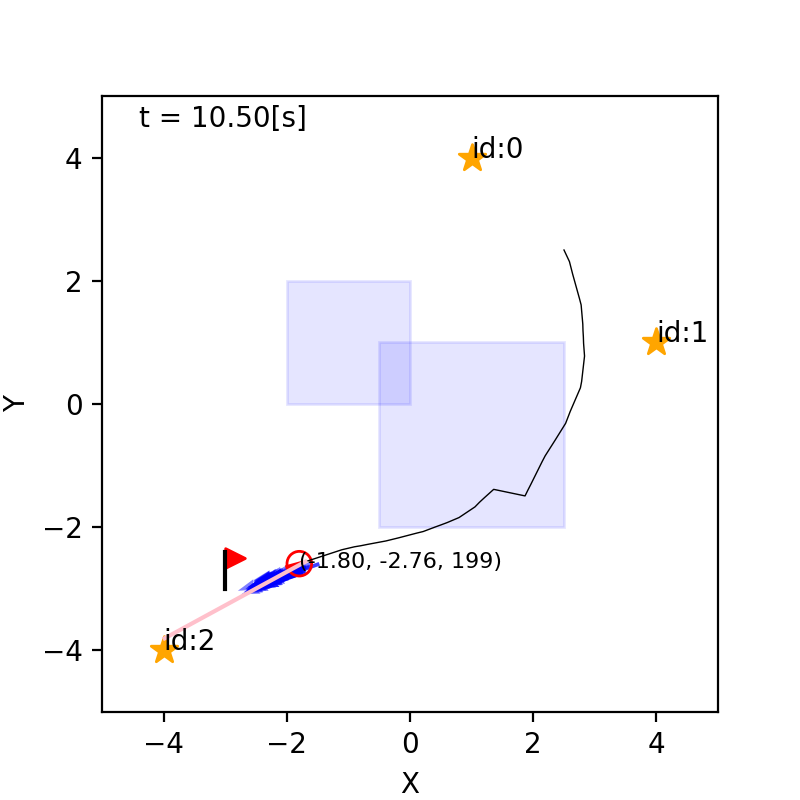

In [8]:
if __name__ == '__main__':  ###qmdp1exec
    time_interval = 0.1
    world = PuddleWorld(30, time_interval, debug=False) 

    ##ランドマークの追加（意地悪な位置に）##
    m = Map()
    m.append_landmark(Landmark(1,4))
    m.append_landmark(Landmark(4,1))
    m.append_landmark(Landmark(-4,-4))
    world.append(m)
    
    ##ゴール・水たまりの追加（これは特に変更なし）##
    goal = Goal(-3,-3)
    puddles = [Puddle((-2, 0), (0, 2), 0.1), Puddle((-0.5, -2), (2.5, 1), 0.1)] 
    world.append(goal)
    world.append(puddles[0]) 
    world.append(puddles[1])
    
    ##ロボットを作る##
    init_pose = np.array([2.5, 2.5, 0]).T
    pf = Mcl(m, init_pose, 100)
    a = QmdpAgent(time_interval, pf, goal, puddles)
    r = Robot(init_pose, sensor=Camera(m), agent=a, color="red")

    world.append(r)
        
    world.draw()